### Exploratory Data Analysis(EDA)

In [7]:
import pandas as pd
import numpy as np

In [8]:
data = pd.read_csv('data/loan.csv' ,low_memory=False)
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


## cleaning data

In [9]:
data.shape

(39717, 111)

In [10]:
data.dropna(axis='columns', how='all', inplace = True)

In [11]:
data.shape

(39717, 57)

In [12]:
data[data.duplicated()==True]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens


In [13]:
data.isnull().sum()/len(data.index)*100

id                             0.000000
member_id                      0.000000
loan_amnt                      0.000000
funded_amnt                    0.000000
funded_amnt_inv                0.000000
term                           0.000000
int_rate                       0.000000
installment                    0.000000
grade                          0.000000
sub_grade                      0.000000
emp_title                      6.191303
emp_length                     2.706650
home_ownership                 0.000000
annual_inc                     0.000000
verification_status            0.000000
issue_d                        0.000000
loan_status                    0.000000
pymnt_plan                     0.000000
url                            0.000000
desc                          32.580507
purpose                        0.000000
title                          0.027696
zip_code                       0.000000
addr_state                     0.000000
dti                            0.000000


#### Delete a column with many missing values.

In [14]:
data.drop(['desc', 'mths_since_last_delinq', 'mths_since_last_record', 'next_pymnt_d'], axis=1,inplace= True)

In [15]:
data.isnull().sum()/len(data.index)*100

id                            0.000000
member_id                     0.000000
loan_amnt                     0.000000
funded_amnt                   0.000000
funded_amnt_inv               0.000000
term                          0.000000
int_rate                      0.000000
installment                   0.000000
grade                         0.000000
sub_grade                     0.000000
emp_title                     6.191303
emp_length                    2.706650
home_ownership                0.000000
annual_inc                    0.000000
verification_status           0.000000
issue_d                       0.000000
loan_status                   0.000000
pymnt_plan                    0.000000
url                           0.000000
purpose                       0.000000
title                         0.027696
zip_code                      0.000000
addr_state                    0.000000
dti                           0.000000
delinq_2yrs                   0.000000
earliest_cr_line         

In [16]:
data.shape

(39717, 53)

In [17]:
data.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'purpose', 'title',
       'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt',
       'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')

In [18]:
data.dtypes

id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
term                           object
int_rate                       object
installment                   float64
grade                          object
sub_grade                      object
emp_title                      object
emp_length                     object
home_ownership                 object
annual_inc                    float64
verification_status            object
issue_d                        object
loan_status                    object
pymnt_plan                     object
url                            object
purpose                        object
title                          object
zip_code                       object
addr_state                     object
dti                           float64
delinq_2yrs                     int64
earliest_cr_line               object
inq_last_6mt

#### investigate wrong type and modify to correct type

In [19]:
# data["issued_d"] = pd.to_datetime(data['issue_d'], format='%b-%y')
# data['emp_length'] = data['emp_length'].replace('< 1 year', '0')
# data['emp_length'] = data.emp_length.str.extract('(\d+)').astype(int)


In [20]:
data["term"]

0         36 months
1         60 months
2         36 months
3         36 months
4         60 months
            ...    
39712     36 months
39713     36 months
39714     36 months
39715     36 months
39716     36 months
Name: term, Length: 39717, dtype: object

In [21]:
data["term_moths"] = data.term.str.strip().str.strip(' months').astype('int')

In [22]:
data["int_rate"]

0        10.65%
1        15.27%
2        15.96%
3        13.49%
4        12.69%
          ...  
39712     8.07%
39713    10.28%
39714     8.07%
39715     7.43%
39716    13.75%
Name: int_rate, Length: 39717, dtype: object

In [23]:
data['int_rate'] = data['int_rate'].str.strip().str.strip('%').astype('float')


In [24]:
data['int_rate']

0        10.65
1        15.27
2        15.96
3        13.49
4        12.69
         ...  
39712     8.07
39713    10.28
39714     8.07
39715     7.43
39716    13.75
Name: int_rate, Length: 39717, dtype: float64

In [25]:
data["grade"].value_counts()

B    12020
A    10085
C     8098
D     5307
E     2842
F     1049
G      316
Name: grade, dtype: int64

In [26]:

data['issue_d'] = pd.to_datetime(data['issue_d'],format='%b-%y')
data['issue_month'] = data.issue_d.dt.month
data['issue_year'] = data.issue_d.dt.year
data['issue_year'] 

0        2011
1        2011
2        2011
3        2011
4        2011
         ... 
39712    2007
39713    2007
39714    2007
39715    2007
39716    2007
Name: issue_year, Length: 39717, dtype: int64

In [27]:
import calendar

data['issue_month'] = data['issue_month'].apply(lambda x: calendar.month_abbr[x])
data['issue_month']

0        Dec
1        Dec
2        Dec
3        Dec
4        Dec
        ... 
39712    Jul
39713    Jul
39714    Jul
39715    Jul
39716    Jun
Name: issue_month, Length: 39717, dtype: object

## Understand each colums and select columns need to analysis.
  * id
  * loan_amnt
  * funded_amnt
  * funded_amnt_inv
  * term_moths
  * int_rate
  * installment
  * grade
  * sub_grade
  * home_ownership
  * loan_status
  * annual_inc
  * verification_status
  * issue_d
  * issue_month
  * issue_year
  * purpose
  * addr_state
  * dti
  * delinq_2yrs
  * inq_last_6mths
  * pub_rec
  * revol_util
  * total_acc
  * pub_rec_bankruptcies

In [28]:
data = data[['id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term_moths', 'int_rate', 'installment','grade', 'sub_grade', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'issue_month', 'issue_year', 'purpose', 'addr_state', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'pub_rec', 'revol_util','total_acc', 'pub_rec_bankruptcies', 'loan_status']]

In [29]:
data.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term_moths,int_rate,installment,grade,sub_grade,home_ownership,...,purpose,addr_state,dti,delinq_2yrs,inq_last_6mths,pub_rec,revol_util,total_acc,pub_rec_bankruptcies,loan_status
0,1077501,5000,5000,4975.0,36,10.65,162.87,B,B2,RENT,...,credit_card,AZ,27.65,0,1,0,83.70%,9,0.0,Fully Paid
1,1077430,2500,2500,2500.0,60,15.27,59.83,C,C4,RENT,...,car,GA,1.00,0,5,0,9.40%,4,0.0,Charged Off
2,1077175,2400,2400,2400.0,36,15.96,84.33,C,C5,RENT,...,small_business,IL,8.72,0,2,0,98.50%,10,0.0,Fully Paid
3,1076863,10000,10000,10000.0,36,13.49,339.31,C,C1,RENT,...,other,CA,20.00,0,1,0,21%,37,0.0,Fully Paid
4,1075358,3000,3000,3000.0,60,12.69,67.79,B,B5,RENT,...,other,OR,17.94,0,0,0,53.90%,38,0.0,Current


![Title](img/Loan_image.png)


When a person applies for a loan, there are <strong>two types of decisions</strong> that could be taken by the company:

   * <strong>Loan accepted</strong>: If the company approves the loan, there are 3 possible scenarios described below:

     * <strong>Fully paid</strong>: Applicant has fully paid the loan (the principal and the interest rate)
        
     * <strong>Current</strong>: Applicant is in the process of paying the instalments, i.e. the tenure of the loan           is not yet completed. These candidates are not labelled as 'defaulted'.

     * <strong>Charged-off</strong>: Applicant has not paid the instalments in due time for a long period of time,           i.e. he/she has defaulted on the loan 

   * <strong>Loan rejected</strong>: The company had rejected the loan (because the candidate does not meet their          requirements etc.). Since the loan was rejected, there is no transactional history of those          applicants with the company and so this data is not available with the company (and thus in this      dataset)

## Univariate Analysis


In [30]:
import seaborn as sns 
import matplotlib.pyplot as plt

In [31]:
data['loan_status'].value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

### Loan Status Analysis

In [32]:
sum_loan_status = pd.DataFrame(data.loan_status.value_counts(normalize=True).mul(100))

In [33]:
sum_loan_status.reset_index(inplace=True)
sum_loan_status

,index,loan_status
0,Fully Paid,82.961956
1,Charged Off,14.167737
2,Current,2.870307


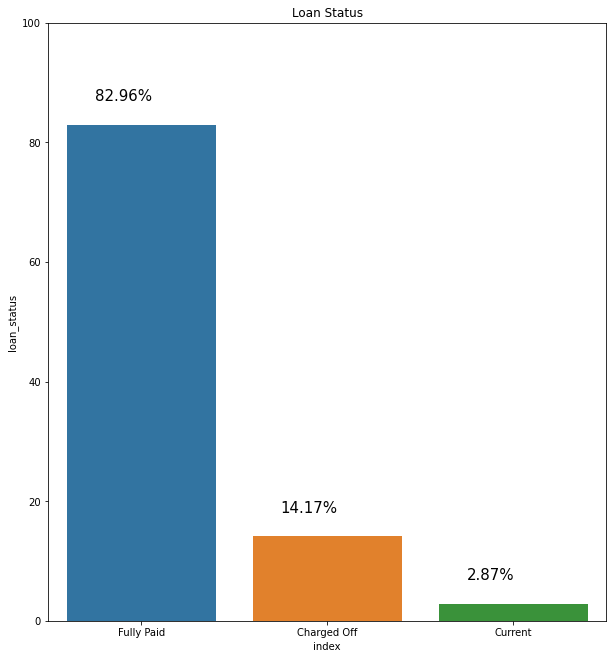

In [34]:
plt.figure(figsize=(10,11))
ax = sns.barplot(x='index',y='loan_status', data=sum_loan_status)
plt.ylim(0,100)
for i in ax.patches:
       ax.text(i.get_x()+0.15, i.get_height()+ 4, \
            str(round((i.get_height()), 2))+"%", fontsize=15, color='black',\
            )

plt.title('Loan Status')
plt.show()

## Observations


  * <span style="color: blue; font-weight: bold;">82.96%</span> <strong>Fully paid</strong>: Applicant has fully paid the loan (the principal and the interest rate)
        
  * <span style="color: blue; font-weight: bold;">2.87%</span><strong>Current</strong>: Applicant is in the process of paying the instalments, i.e. the tenure of the loan           is not yet completed. These candidates are not labelled as 'defaulted'.

  * <span style="color: blue; font-weight: bold;">14.17%</span><strong>Charged-off</strong>: Applicant has not paid the instalments in due time for a long period of time,           i.e. he/she has defaulted on the loan 


### Loan Address state Analysis

In [35]:
loan_addr_state = pd.DataFrame(data.addr_state.value_counts(normalize=True).mul(100))

In [36]:
loan_addr_state.reset_index(inplace=True)
loan_addr_state = loan_addr_state.head(10)
loan_addr_state

,index,addr_state
0,CA,17.873958
1,NY,9.597905
2,FL,7.216054
3,TX,6.866077
4,NJ,4.657955
5,IL,3.839666
6,PA,3.819523
7,VA,3.542564
8,GA,3.519903
9,MA,3.373870


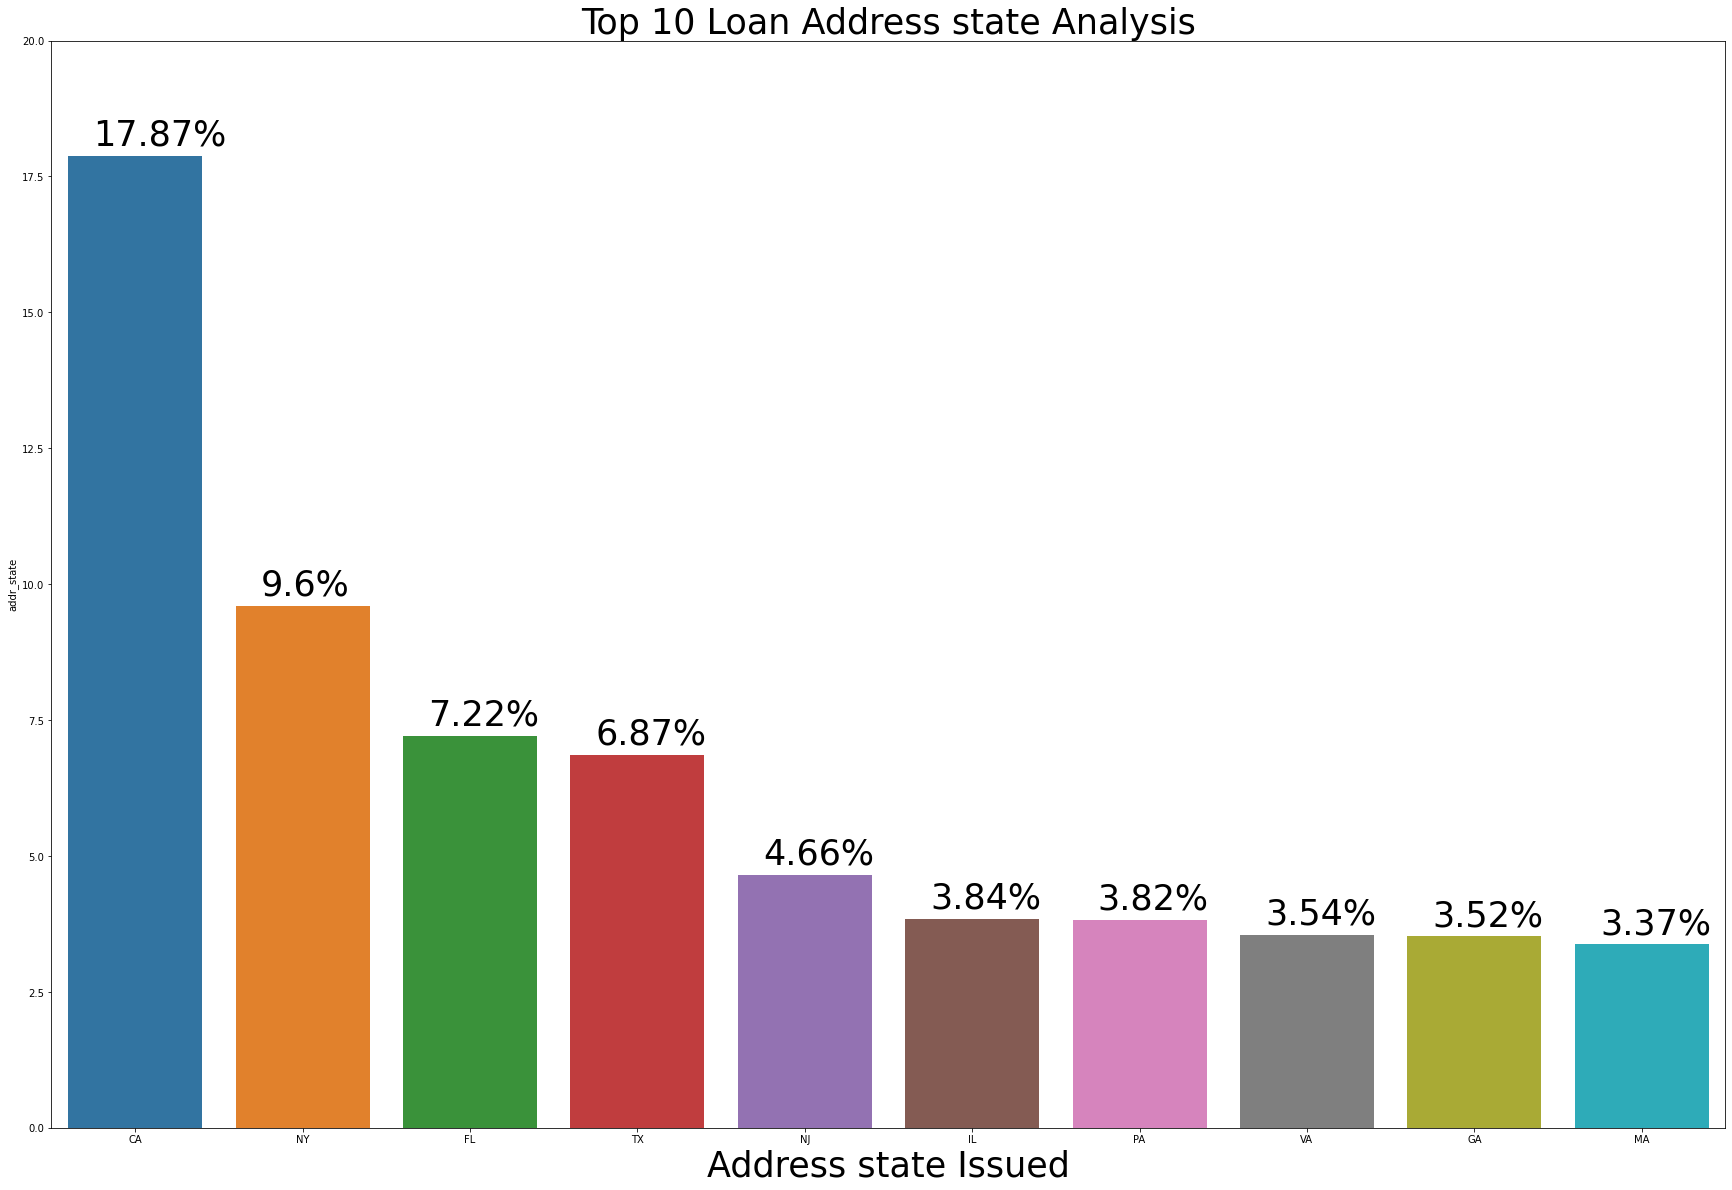

In [37]:
plt.figure(figsize=(30,20))
ax = sns.barplot(x='index',y='addr_state', data=loan_addr_state)
plt.ylim(0,20)
# sns.set(font_scale = 2)
for i in ax.patches:
       ax.text(i.get_x()+0.15, i.get_height()+ 0.2, \
            str(round((i.get_height()), 2))+"%", fontsize=35, color='black',\
            )

plt.xlabel('Address state Issued', fontsize= 35)
plt.title('Top 10 Loan Address state Analysis', fontsize= 35)
plt.show()

In [38]:
def draw_graph(columns):
    loan_analysis = pd.DataFrame(data[columns].value_counts(normalize=True).mul(100))
    loan_analysis.reset_index(inplace=True)
    # loan_analysis = loan_analysis.head(10)
    loan_analysis

    plt.figure(figsize=(30,20))
    ax = sns.barplot(x='index',y=columns, data=loan_analysis)
    # sns.set(font_scale = 2)
    for i in ax.patches:
           ax.text(i.get_x()+0.1, i.get_height()+ 0.2, \
                str(round((i.get_height()), 2))+"%", fontsize=35, color='black',\
                )

    plt.ylabel('percent '+ columns, fontsize= 35)
    plt.xlabel(columns, fontsize= 35)

    plt.title('Loan ' + columns + ' Analysis', fontsize= 35)
    plt.xticks(rotation=45,fontsize=25)
    plt.show()

### Loan Purpose Analysis

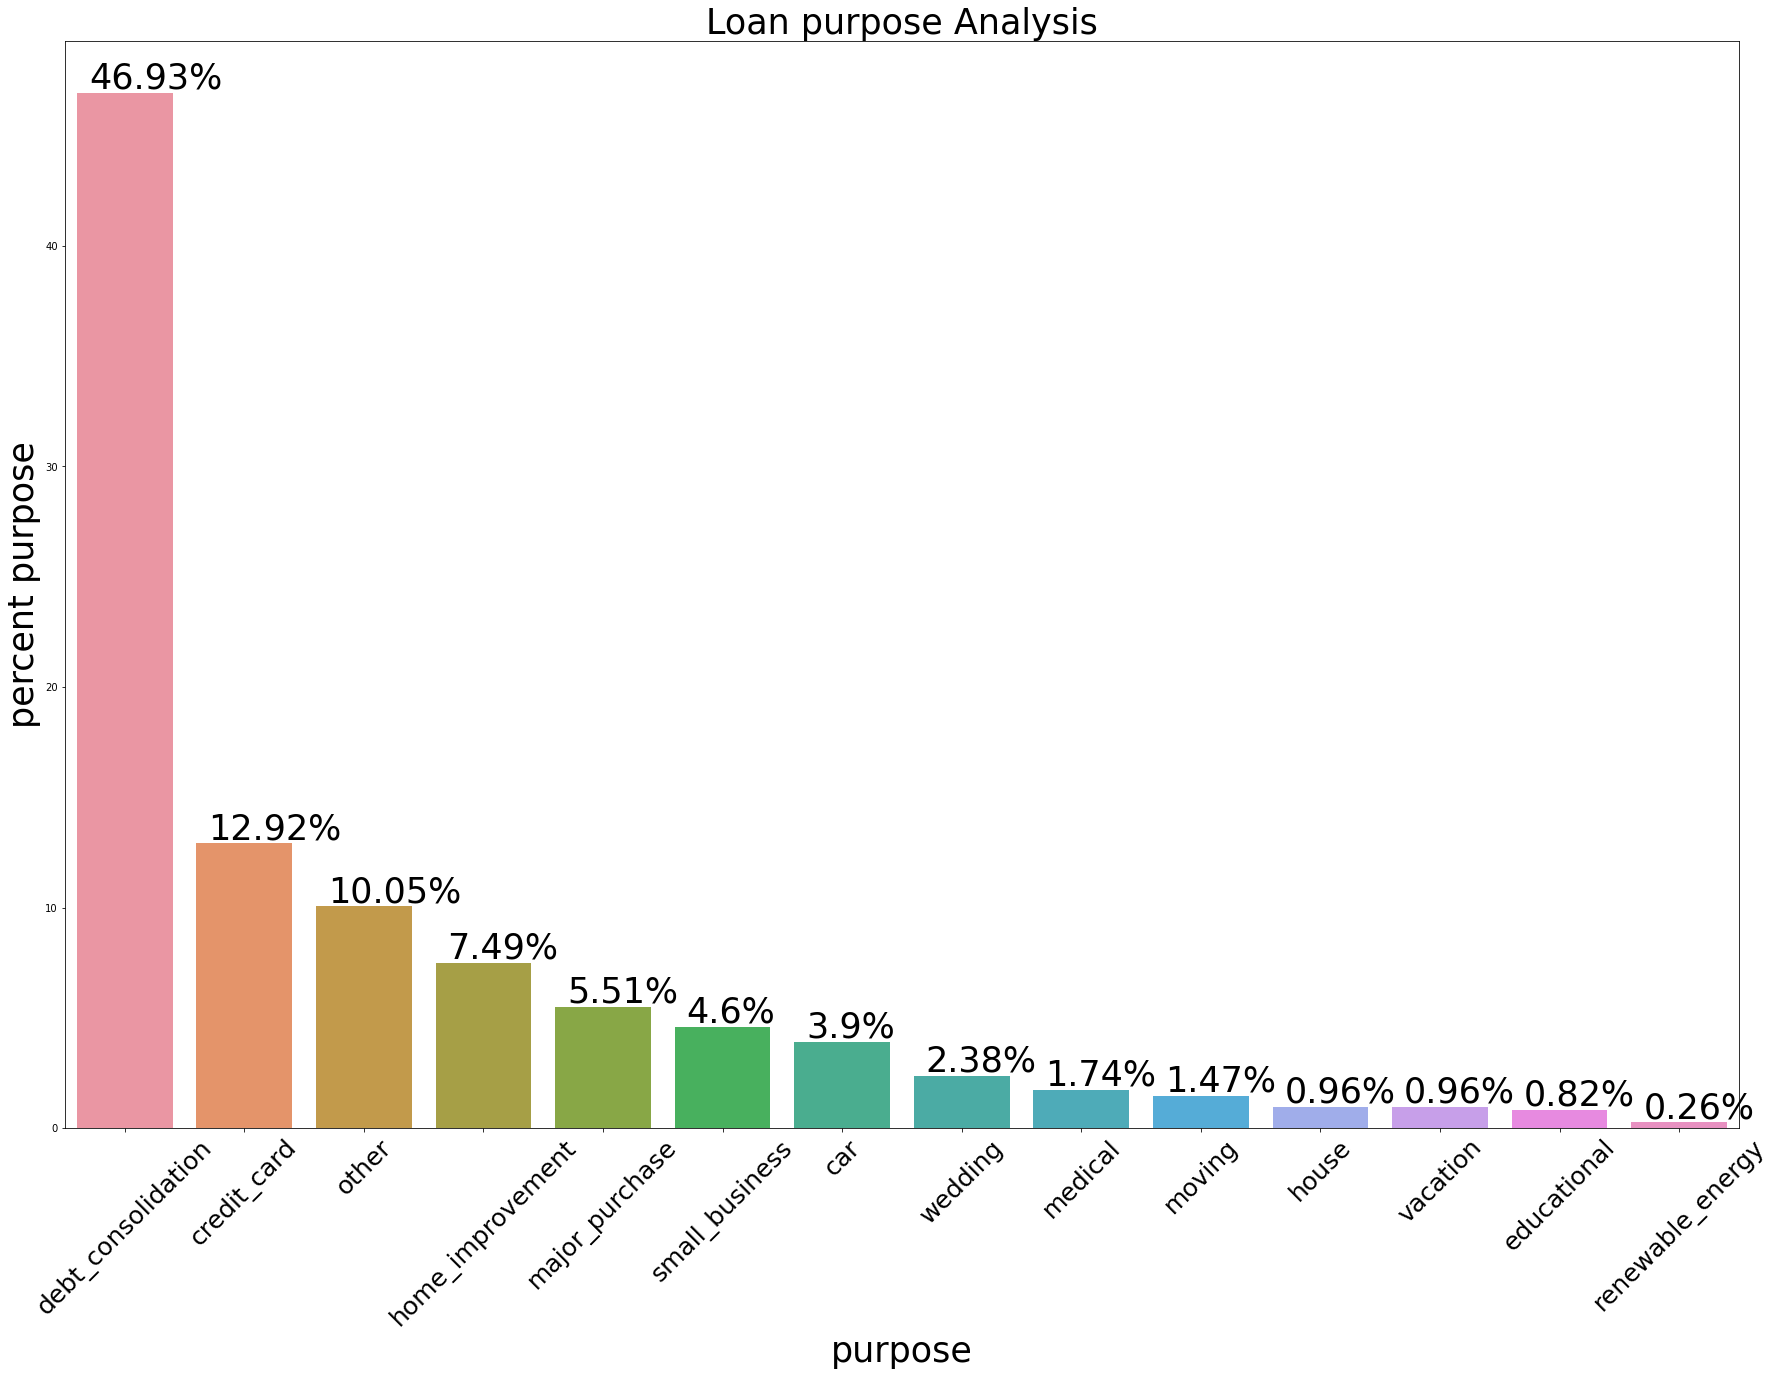

In [39]:
draw_graph('purpose')

### Loan issue_month Analysis

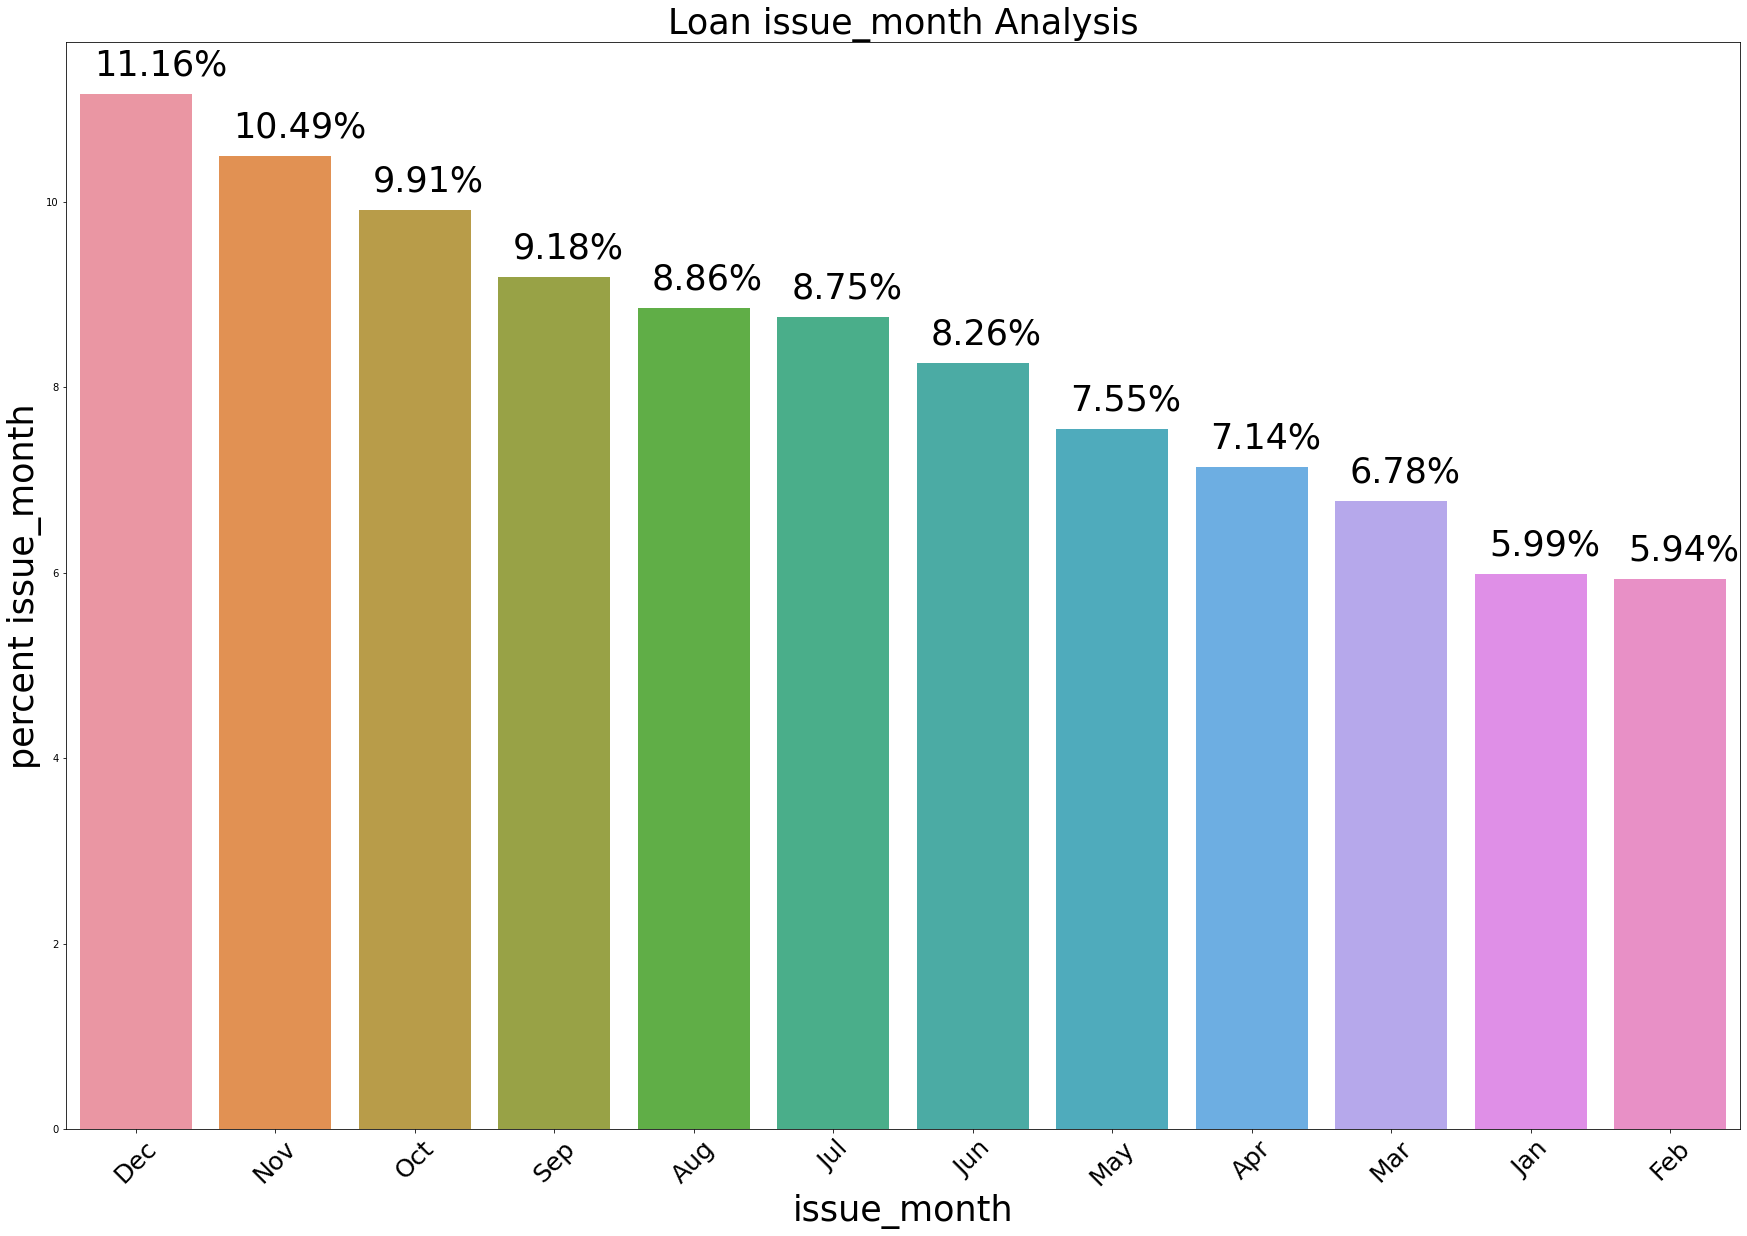

In [40]:
draw_graph('issue_month')

### Loan issue_month Analysis


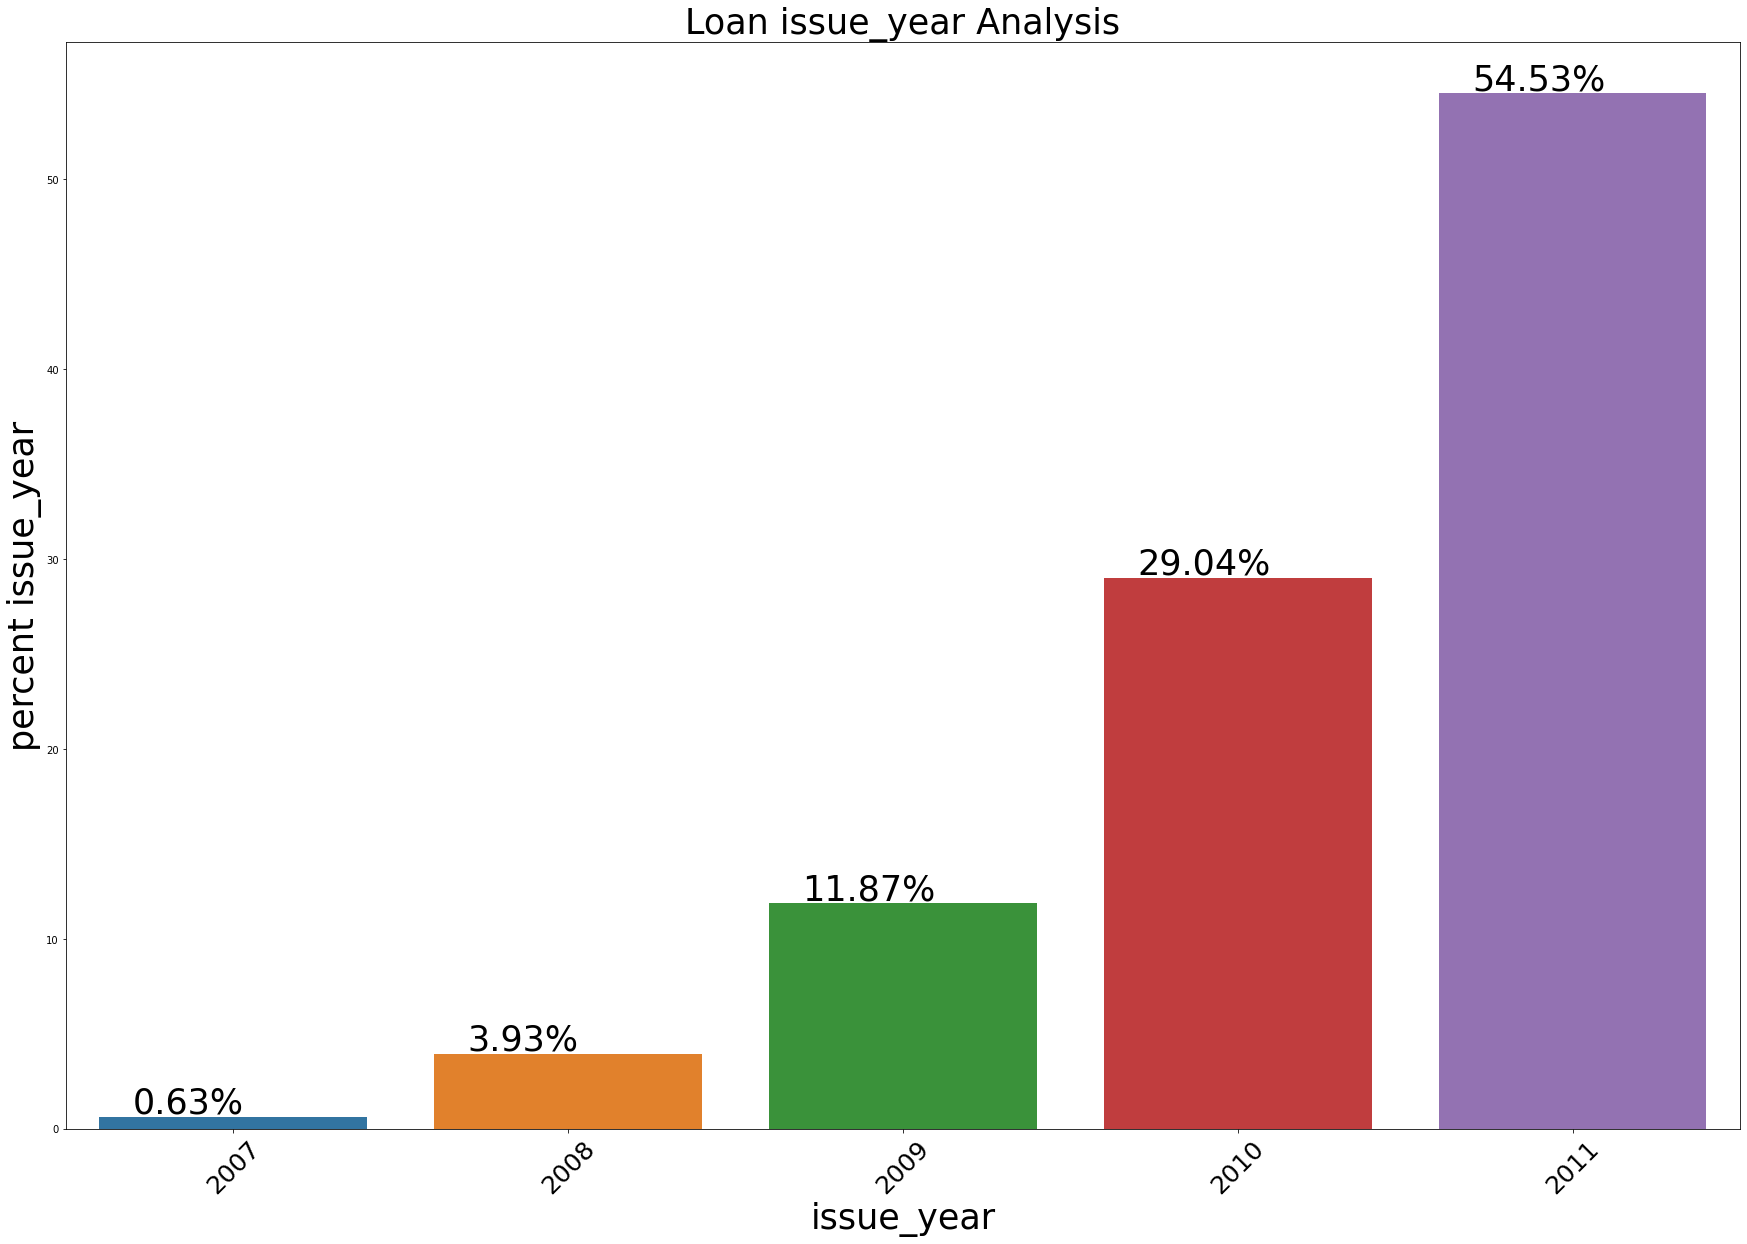

In [41]:
draw_graph('issue_year')

In [42]:
def boxplot(key, label):
    plt.figure(figsize=(15,7))
    sns.set(style='white')

    plt.subplot(1, 2, 1)

    sns.boxplot(y = data[key] , palette='RdYlGn')
    plt.title('Box Plot: '+ label +' ', fontsize= 20, fontweight='bold', pad=10)
    plt.ylabel(label+' US$', fontsize= 18, fontstyle='italic')
    plt.grid(True)


    plt.tight_layout()
    plt.show()

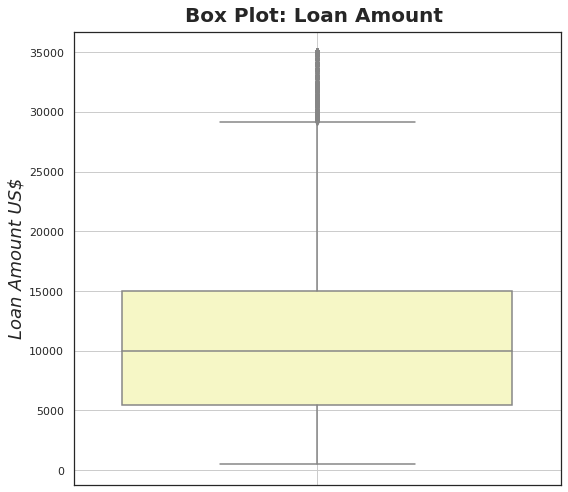

In [43]:
#'Applicant's Loan amount' analysis.
boxplot('loan_amnt', 'Loan Amount')

In [44]:
# #'Applicant's Loan amount' analysis.
# plt.figure(figsize=(15,7))
# sns.set(style='white')

# plt.subplot(1, 2, 1)

# sns.boxplot(y = data.loan_amnt , palette='RdYlGn')
# plt.title('Box Plot: Loan Amount', fontsize= 20, fontweight='bold', pad=10)
# plt.ylabel('Loan Amount US$', fontsize= 18, fontstyle='italic')
# plt.grid(True)


# plt.tight_layout()
# plt.show()

In [45]:
data.loan_amnt.describe()

count    39717.000000
mean     11219.443815
std       7456.670694
min        500.000000
25%       5500.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

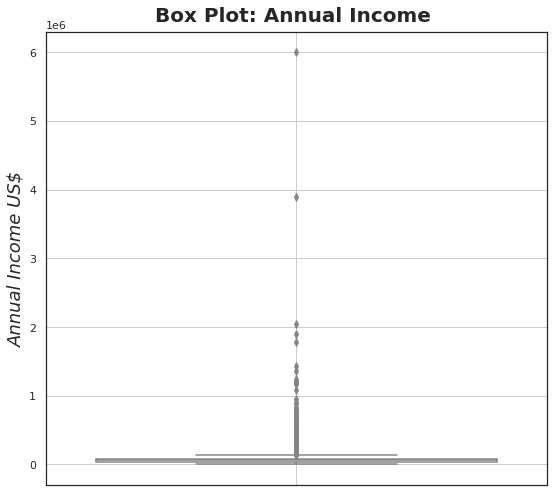

In [46]:
#'Applicant's Loan amount' analysis.
boxplot('annual_inc', 'Annual Income')

# max value too high, outliner

Removing outlier

In [47]:
data = data.loc[data.annual_inc <= data.annual_inc.quantile(0.99)]


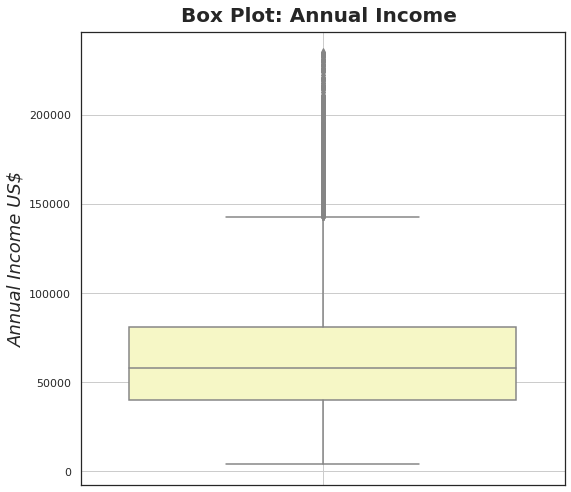

In [48]:
boxplot('annual_inc', 'Annual Income')

In [49]:
data.annual_inc.describe()

count     39319.000000
mean      65524.215803
std       35215.885297
min        4000.000000
25%       40000.000000
50%       58000.000000
75%       81000.000000
max      234996.000000
Name: annual_inc, dtype: float64

# BIVARIATE

In [50]:
data.columns

Index(['id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term_moths',
       'int_rate', 'installment', 'grade', 'sub_grade', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'issue_month',
       'issue_year', 'purpose', 'addr_state', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'pub_rec', 'revol_util', 'total_acc',
       'pub_rec_bankruptcies', 'loan_status'],
      dtype='object')

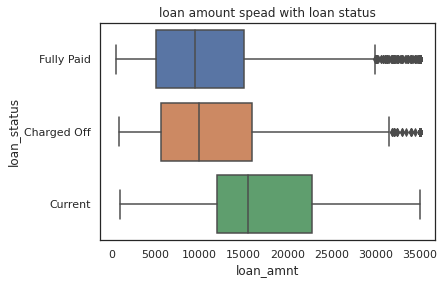

In [54]:
plt.title('loan amount with loan status')
sns.boxplot(y='loan_status', x='loan_amnt', data=data)
plt.show()

#### loan amount with loan status
 * No signifiant to observed

In [98]:
def draw_graph_BIVARIATE(columnsX, columnY, df):


    plt.figure(figsize=(30,20))
    ax = sns.barplot(x=columnsX,y=columnY, data=df)
    # sns.set(font_scale = 2)

    plt.ylabel(columnY, fontsize= 35)
    plt.xlabel(columnsX, fontsize= 35)

    plt.title( columnsX + ' VS ' + columnY, fontsize= 35)
    plt.xticks(rotation=45,fontsize=25)
    plt.show()

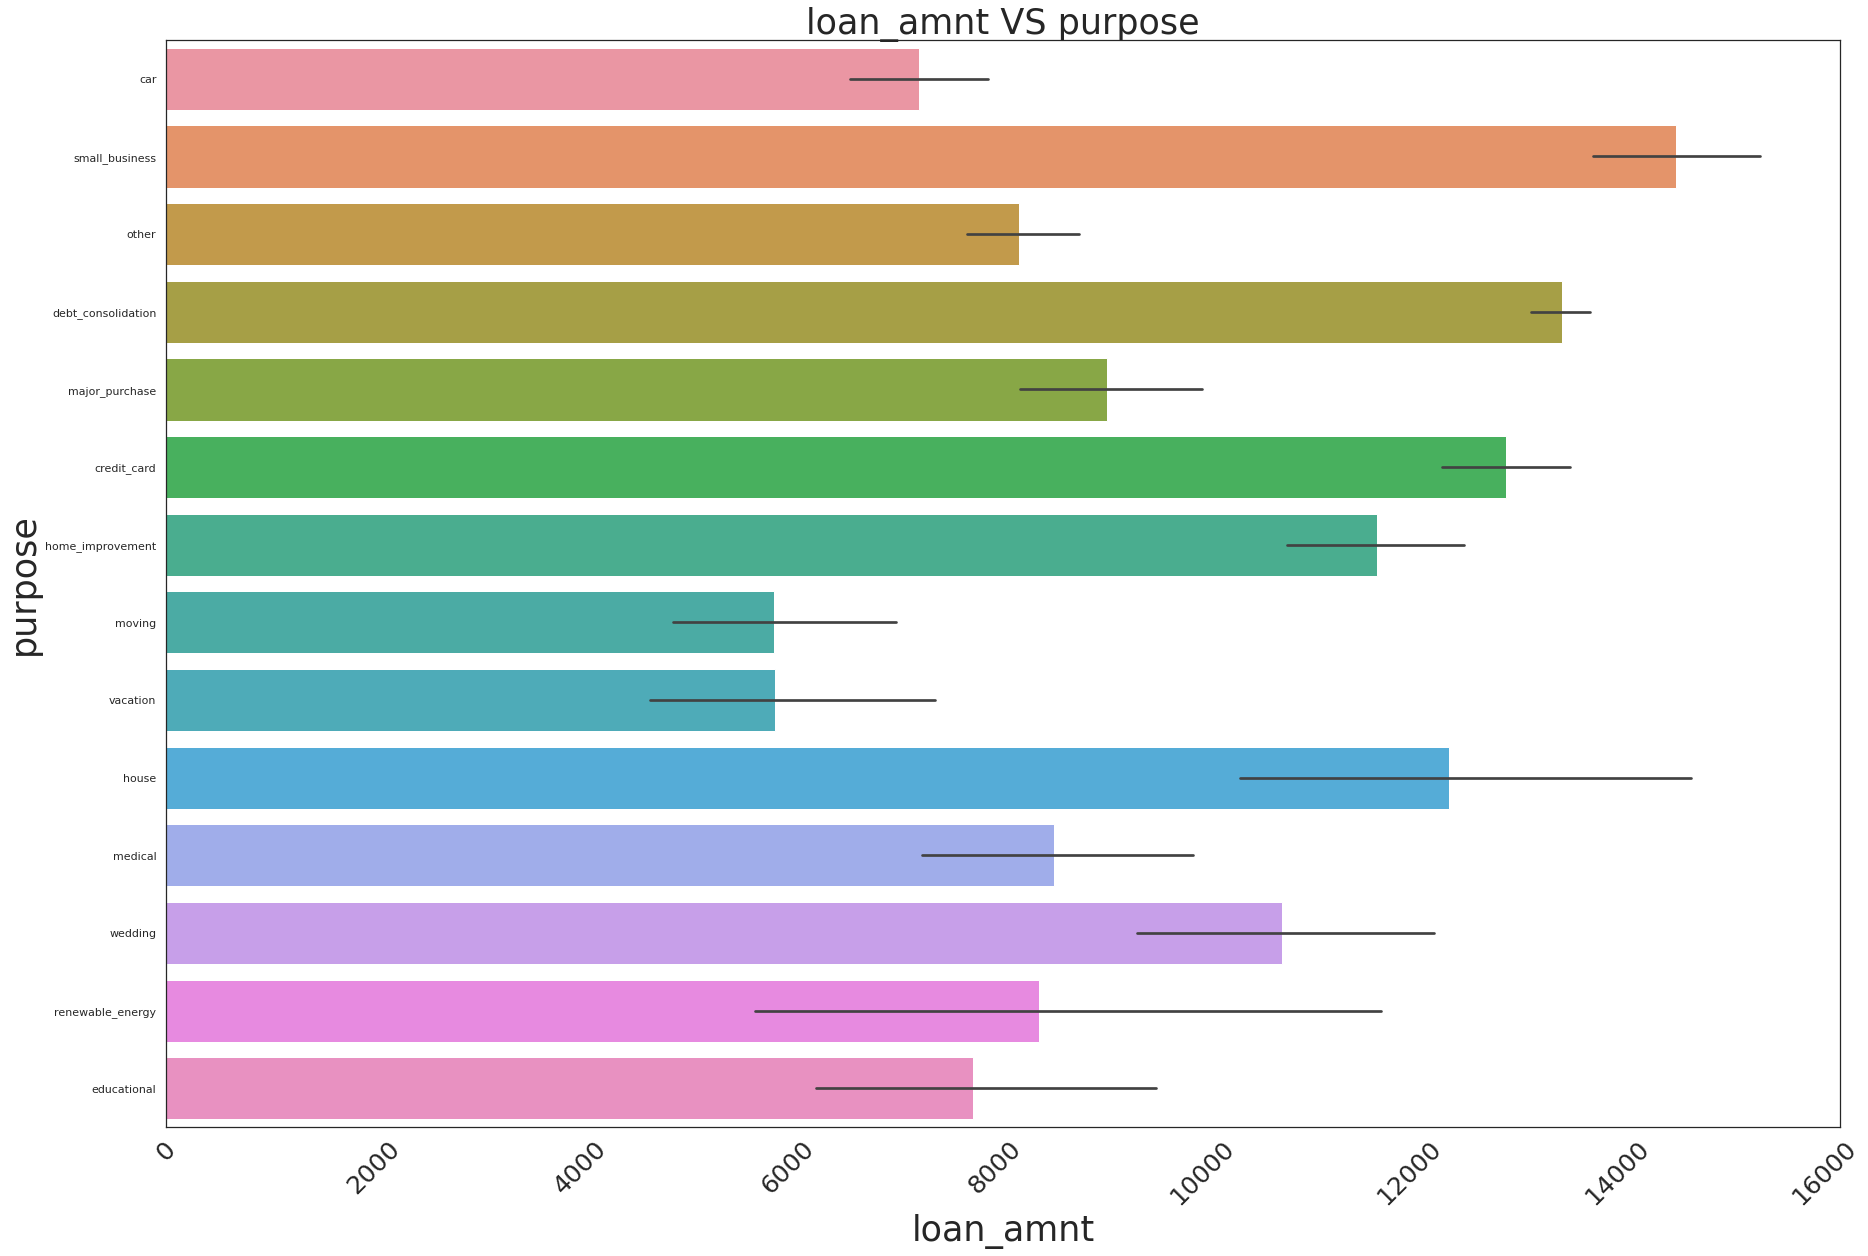

In [99]:
dataChargedOff = data[data["loan_status"]=="Charged Off"]
draw_graph_BIVARIATE('loan_amnt', 'purpose', dataChargedOff)

#### purpose with loan status Charged Off
 * change off ที่มีการกู้ต่อสูงสุดคือ เอา ไปต่อยอด ธุรกิจ อันต่อมาคือ ปิดหนี้บัตเครดิต

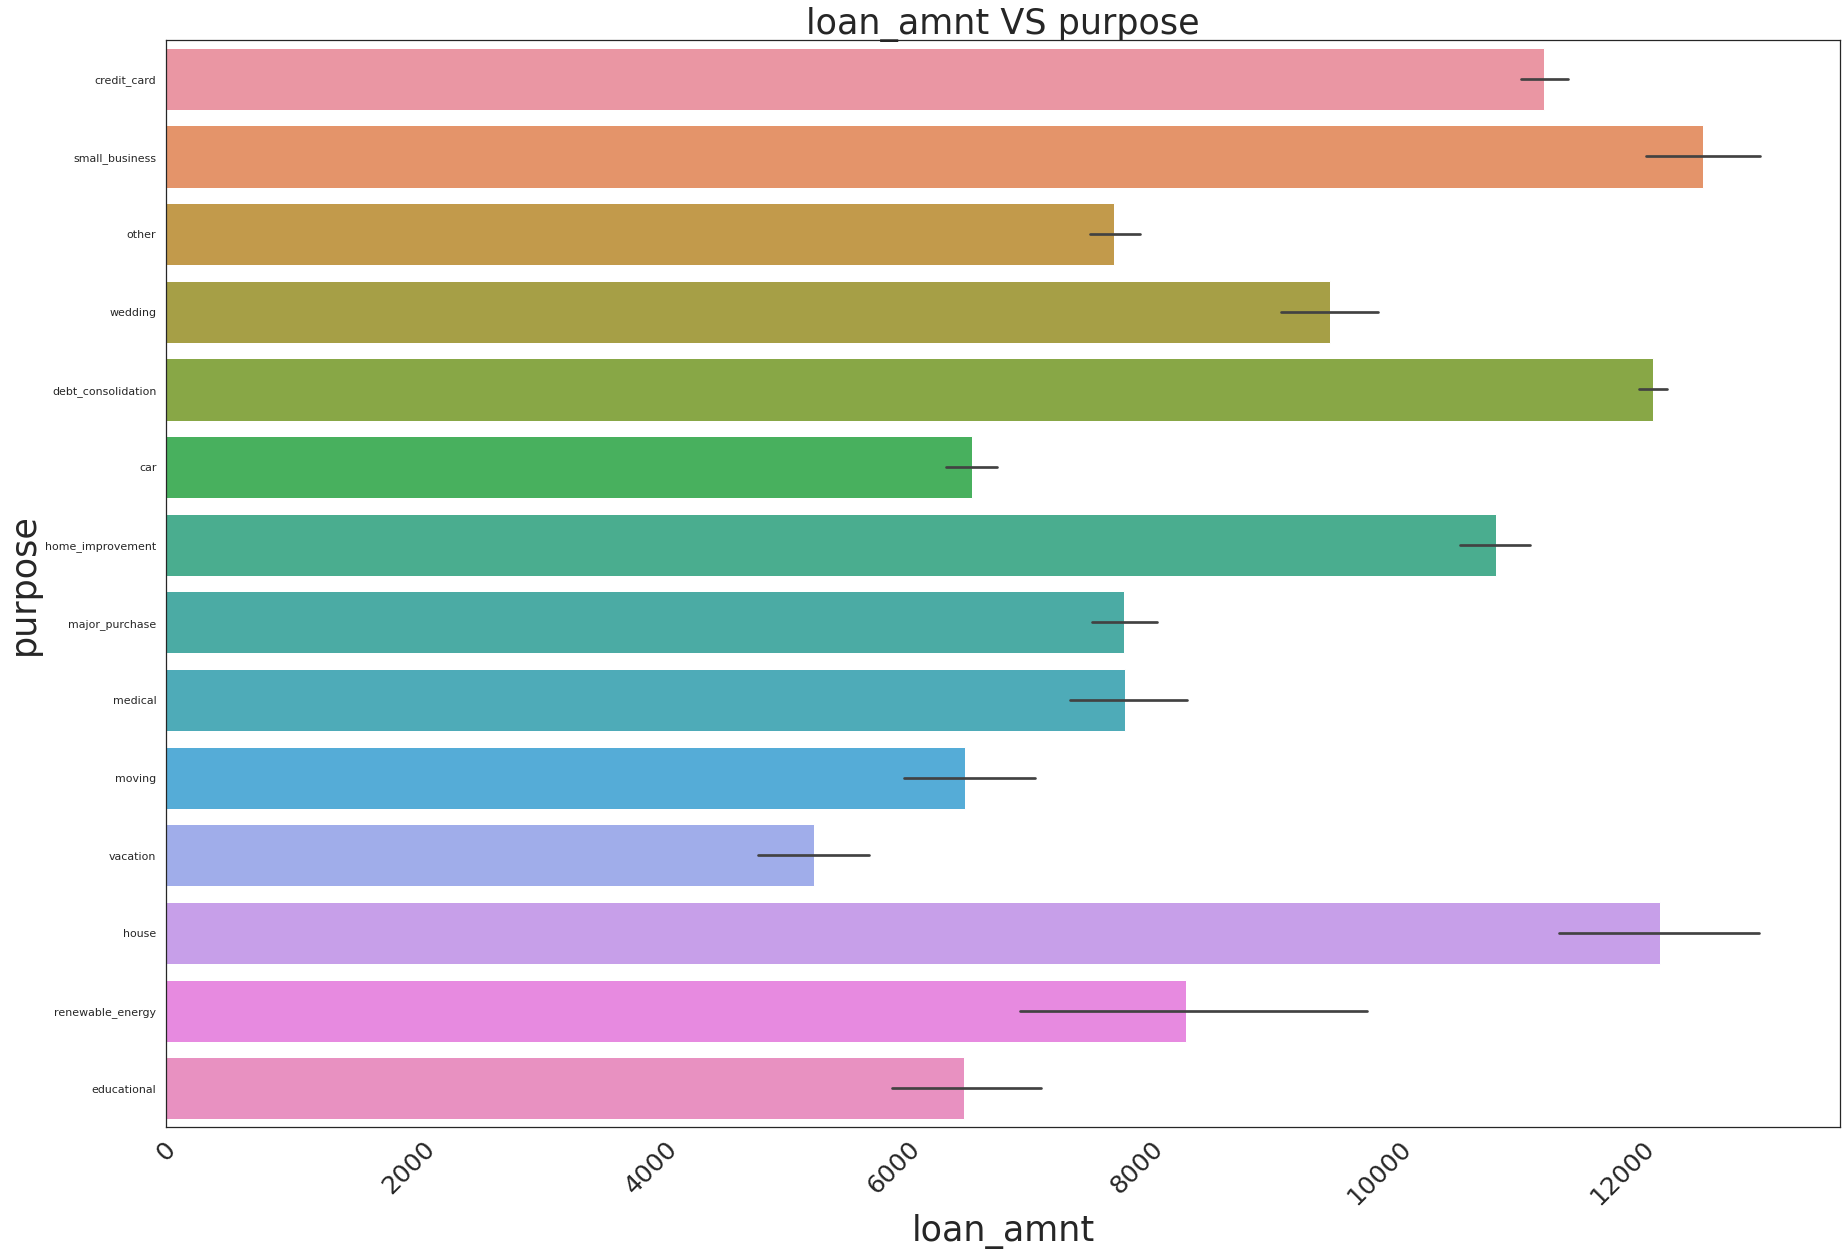

In [100]:
dataFullyPaid = data[data["loan_status"]=="Fully Paid"]
draw_graph_BIVARIATE('loan_amnt', 'purpose', dataFullyPaid)

#### purpose with loan status Fully Paid
 * Fully Paid ที่มีการกู้ต่อสูงสุดคือ เอา ไปต่อยอด ธุรกิจ อันต่อมาคือ house

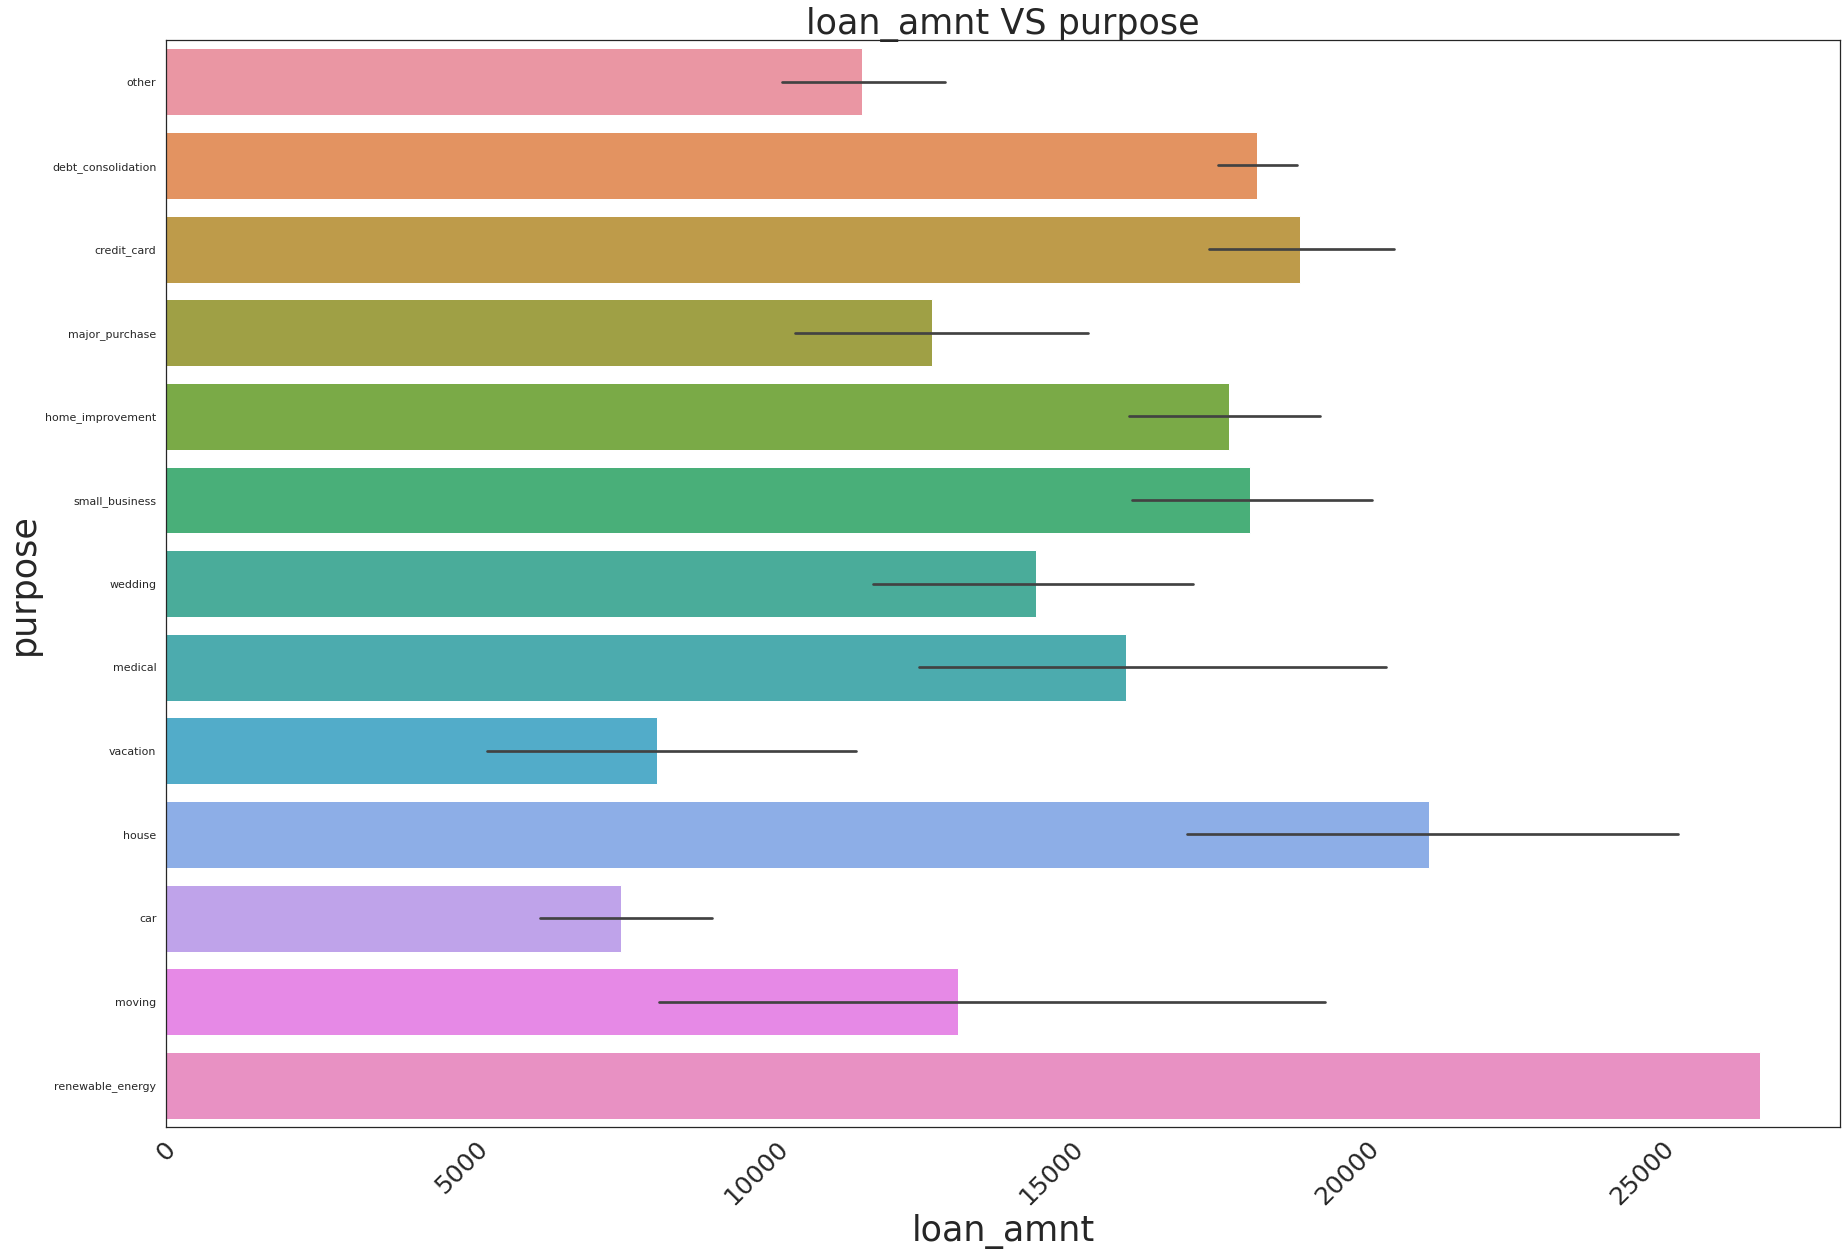

In [101]:
dataCurrent = data[data["loan_status"]=="Current"]
draw_graph_BIVARIATE('loan_amnt', 'purpose', dataCurrent)

#### purpose with loan status Current
 * Current ที่มีการกู้ต่อสูงสุดคือ เอา ไป renewable_energy อันต่อมาคือ house

In [107]:
def bar_bi(x,y,hue):
    plt.subplots(nrows =1,ncols=1,figsize=(20,8))
    plt.title(x +' vs '+y)
    if hue:
        sns.barplot(data =data, x=x, y=y, hue =hue)
    else:
        sns.barplot(data =data, x=x, y=y)

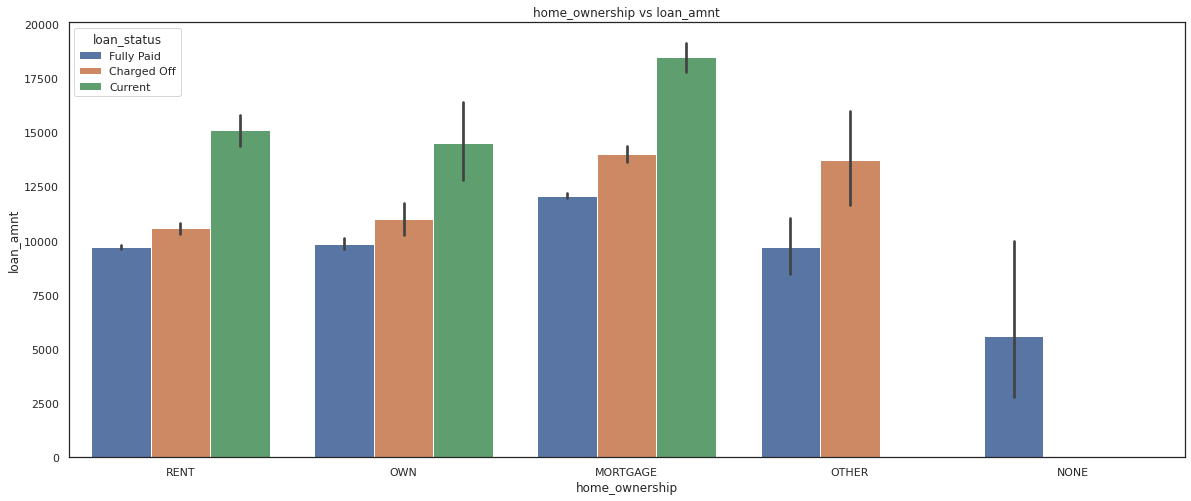

In [109]:
bar_bi('home_ownership' ,'loan_amnt', 'loan_status')

#### home_ownership with loan_status and loan_amnt
 * จะเห็นได้ว่า ค่าเฉลี่ยการกู้สูงสุด มี สถานะบ้าน MORTGAGE

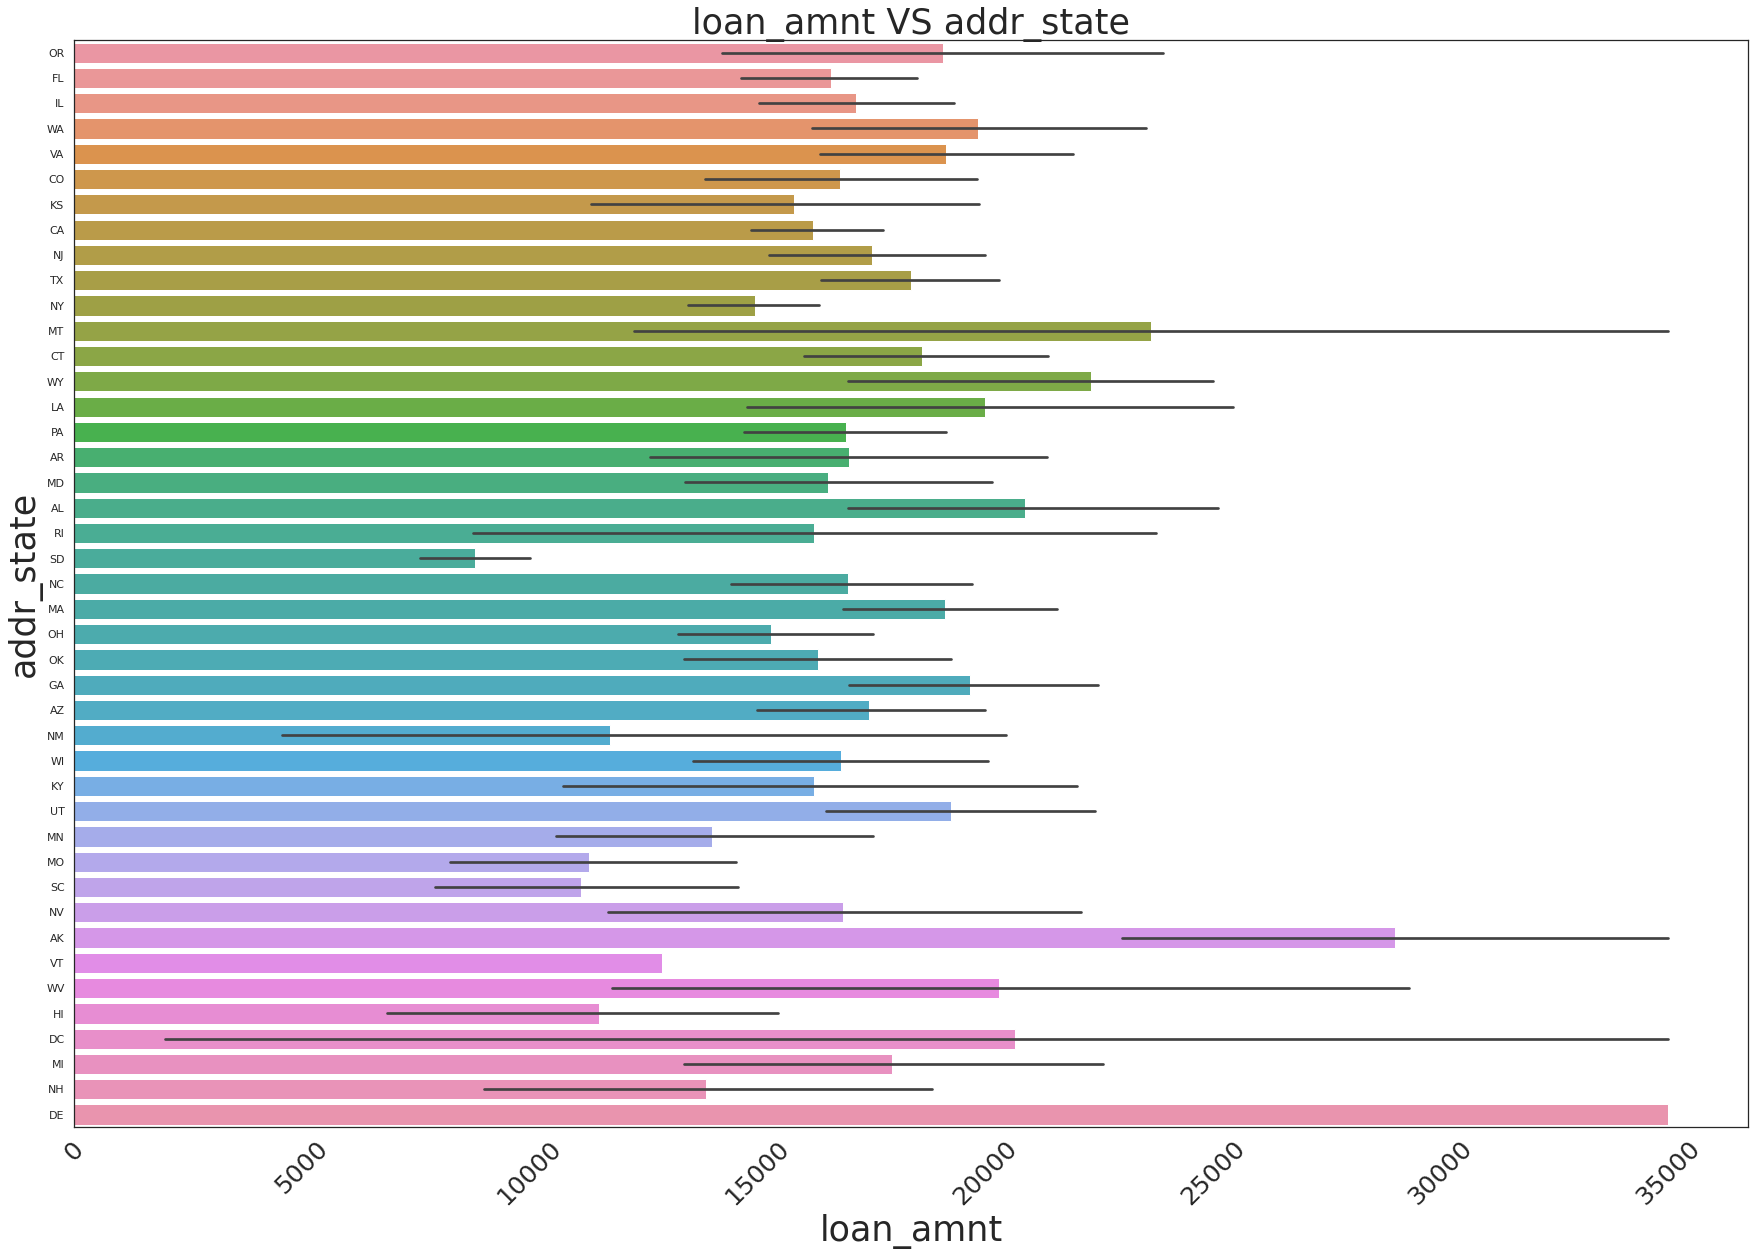

In [112]:
draw_graph_BIVARIATE('loan_amnt', 'addr_state', dataCurrent)

In [ ]:
FullyPaid high state loan is AK

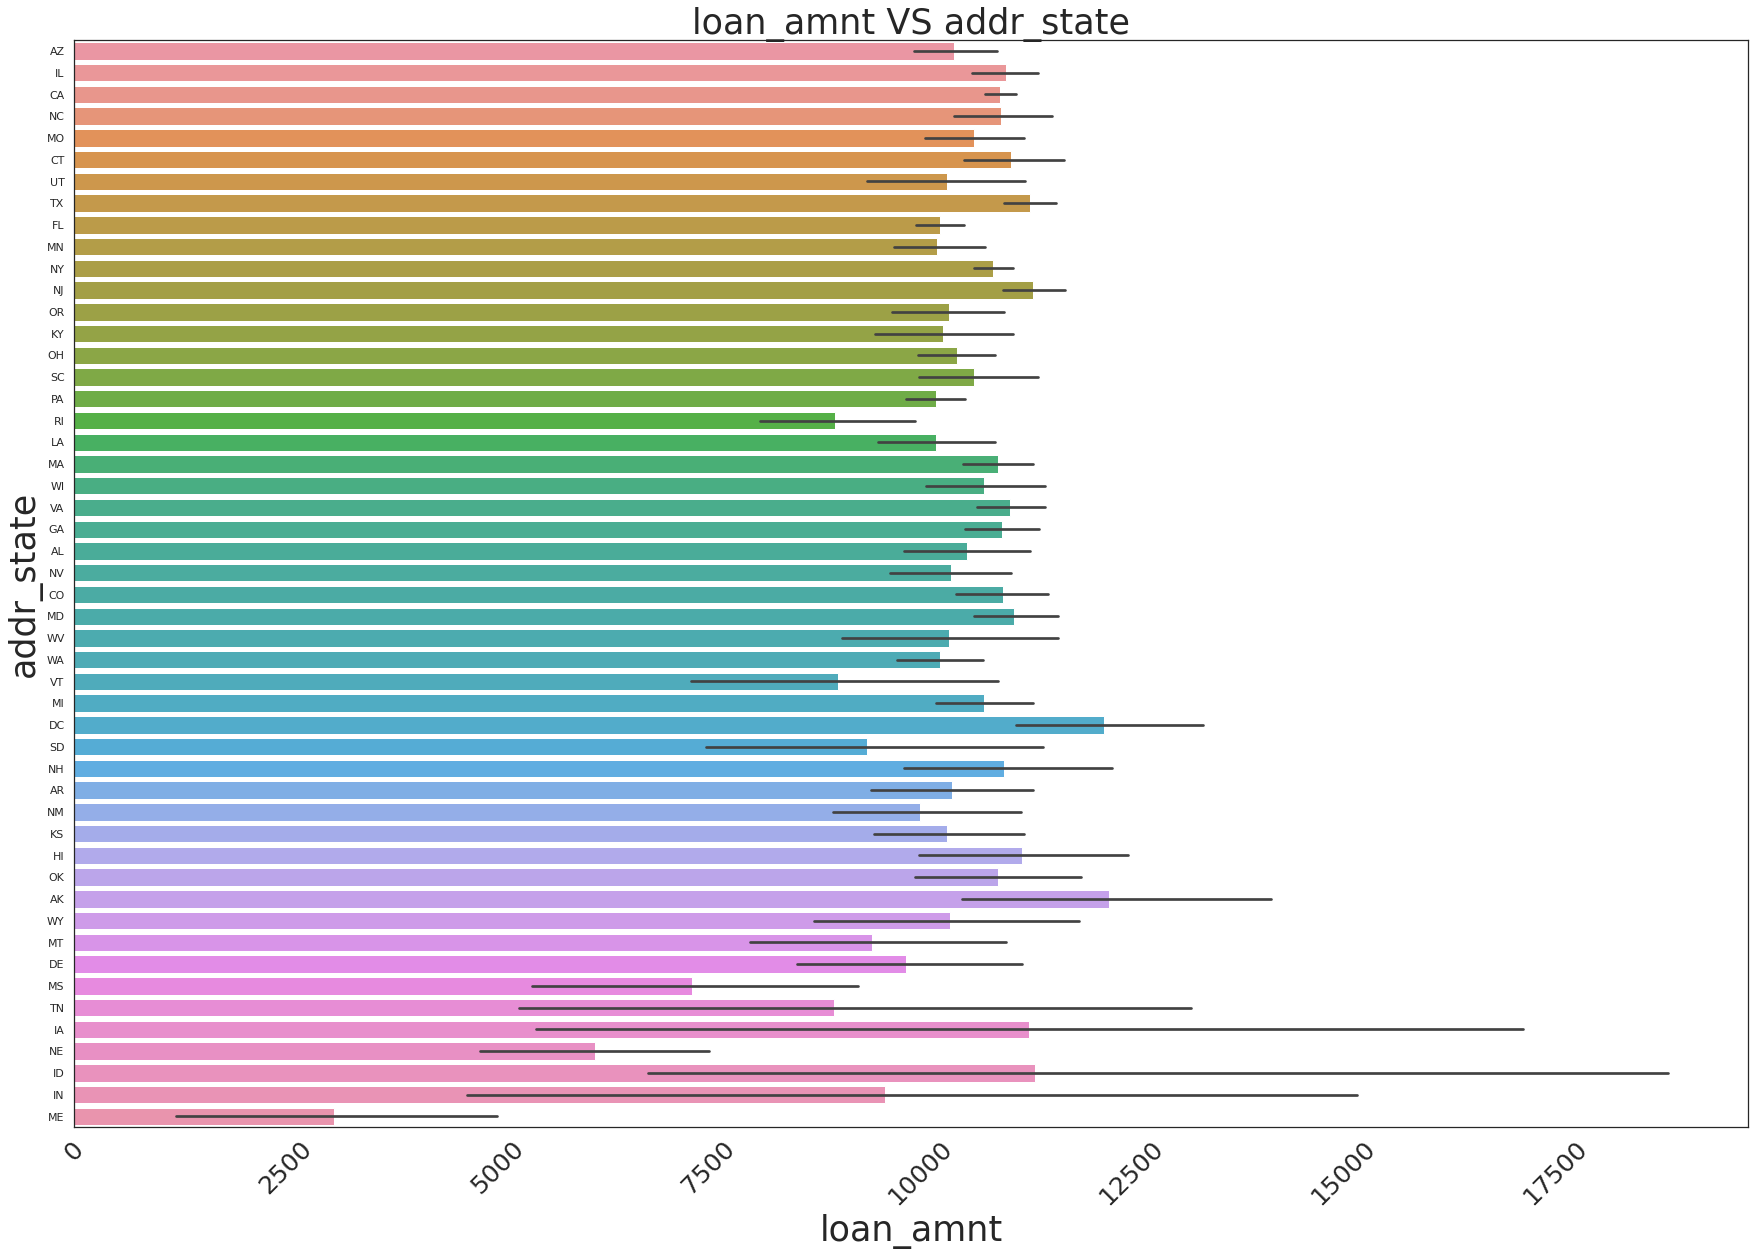

In [113]:
draw_graph_BIVARIATE('loan_amnt', 'addr_state', dataFullyPaid)

FullyPaid high state loan is AK

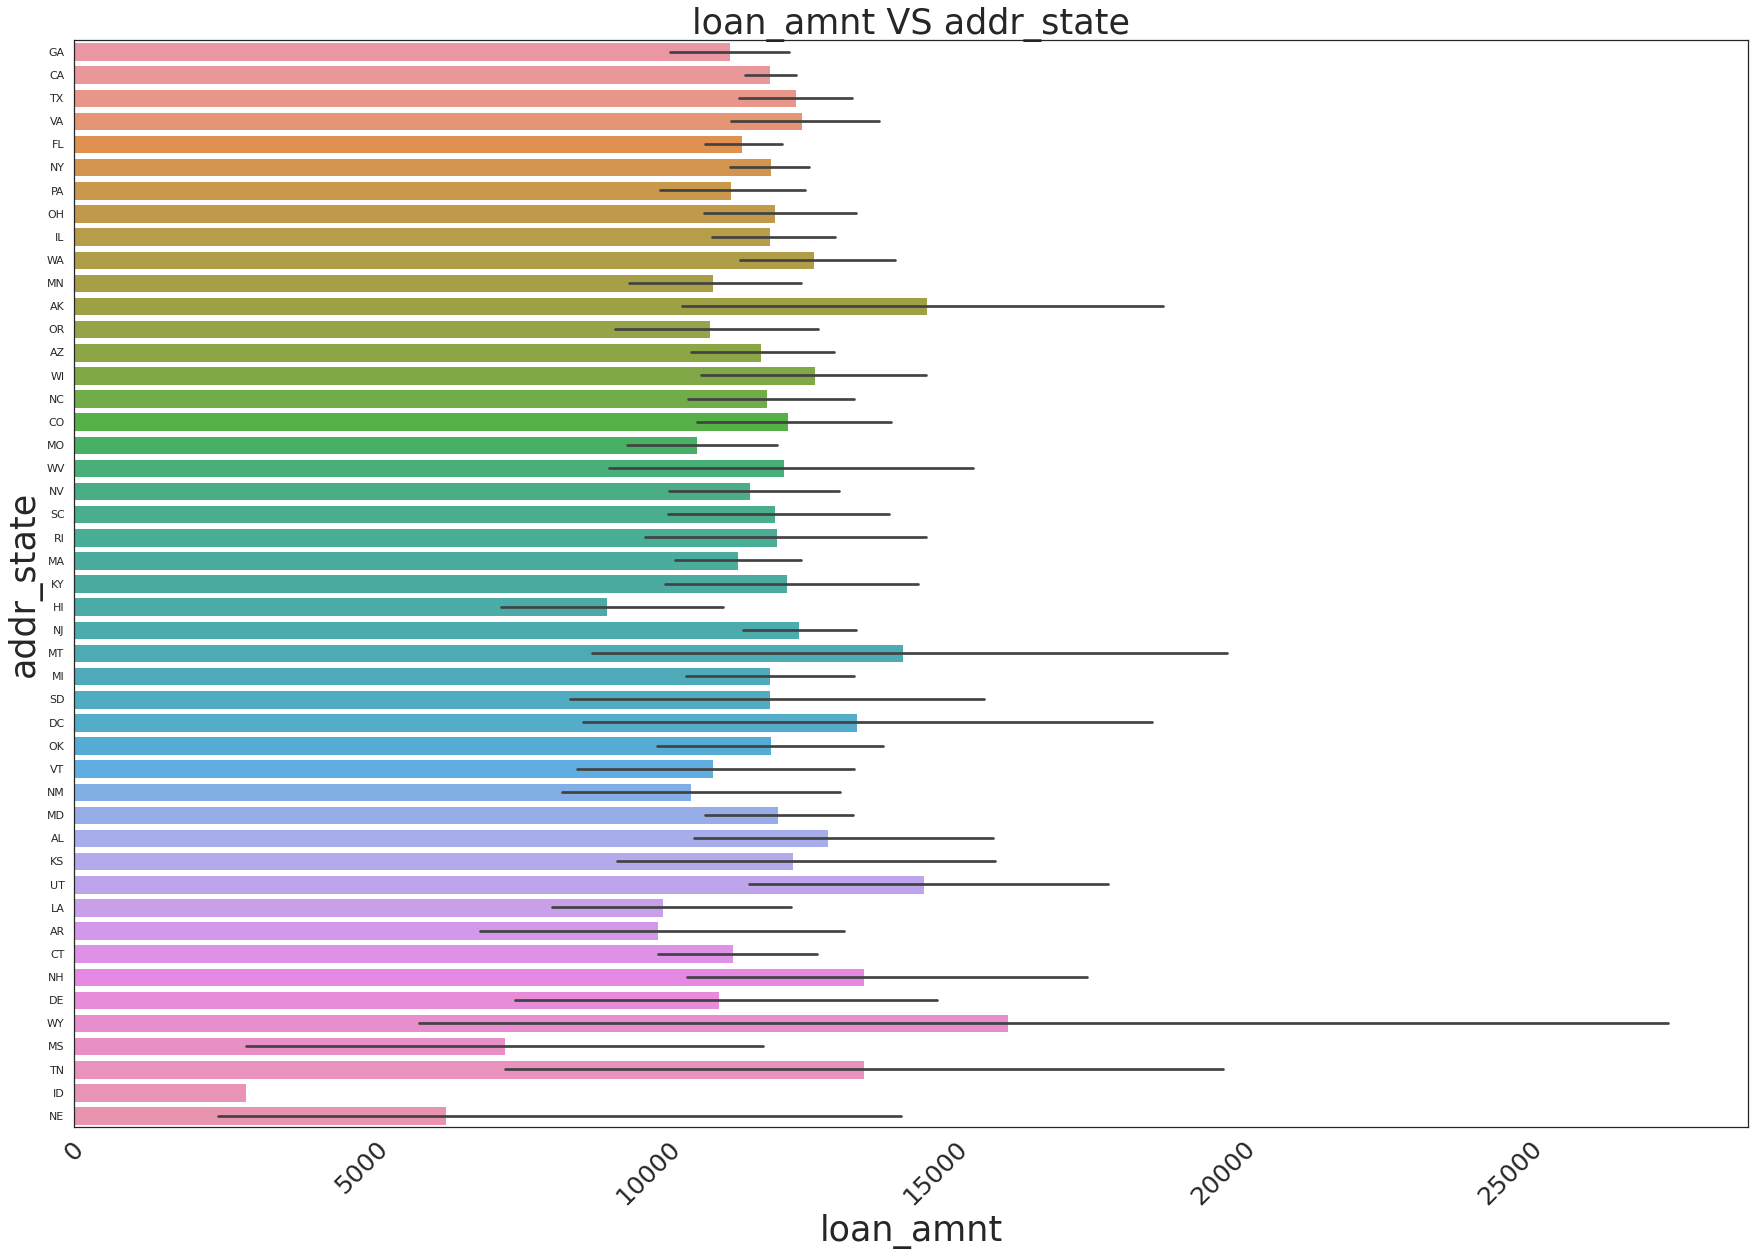

In [116]:
draw_graph_BIVARIATE('loan_amnt', 'addr_state', dataChargedOff)

ChargedOff high state loan is WY	